# Preliminary Analysis of CMM Data

This notebook provides some very preliminary analysis for coordinate measuring machine (CMM) data collected from a variant of the NIST multi-pin layout (henceforth referred to as the "APL artifact").


In [96]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2

__author__ = "mjp"
__version__ = "0.0.1"
__status__ = "development"

__copyright__ = "Copyright 2016, JHU/APL"
__license__ = "Apache, Version 2.0"

import os, csv

import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import axes3d, art3d

from helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Pin Location Errors

The plot below shows one quadrant of the design and measured pin locations for one quadrant of the APL artifact (the +$z$ axis is coming out of the page).  Although almost imperceptible, the measured pin locations (blue) are slightly offset from the designed locations (magenta). 

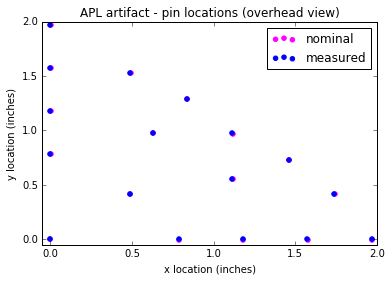

In [97]:
inDir = os.path.join('..', 'data')
inFile = os.path.join(inDir, 'NIST_randomized_metal_no1.csv')
Z = load_data(inFile)

# extract data of interest
# The measured variables wear hats.
x = Z[:,0];  xHat = Z[:,1]
y = Z[:,2];  yHat = Z[:,3]
d = Z[:,4];  dHat = Z[:,5]
z = Z[:,6];  zHat = Z[:,7]

r, theta = cart2polar(x,y)
rHat, thetaHat = cart2polar(xHat, yHat)

plt.figure()
plt.scatter(x, y, color='magenta')
plt.scatter(xHat, yHat, color='blue')
plt.legend(['nominal', 'measured'])
plt.title('APL artifact - pin locations (overhead view)')
plt.xlim([-.05, 2])
plt.ylim([-.05, 2])
plt.xlabel('x location (inches)')
plt.ylabel('y location (inches)')

## A Global Rotation?

From the plot above, it appears as if the measured points correspond to a slight counter-clockwise rotation of the design points about the $z$ axis.  If one plots location error in the $x$ and $y$ dimensions as a function of angle and distance of the pin from the artifact origin, one indeed observes a periodic pattern in the errors (below).  A natural question is whether these location errors could be (partially) explained by a slight rotation in the build plate relative to the design?



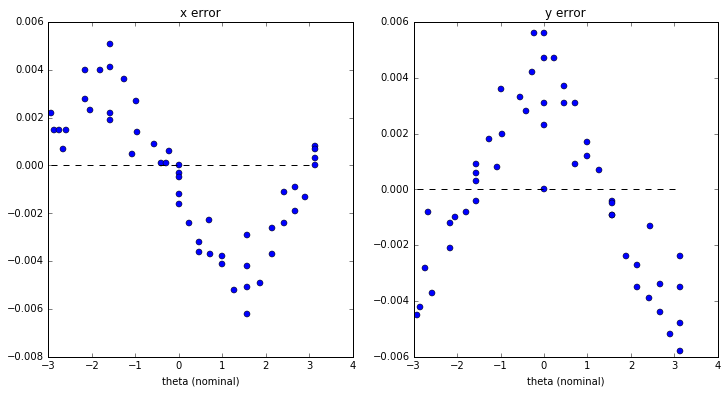

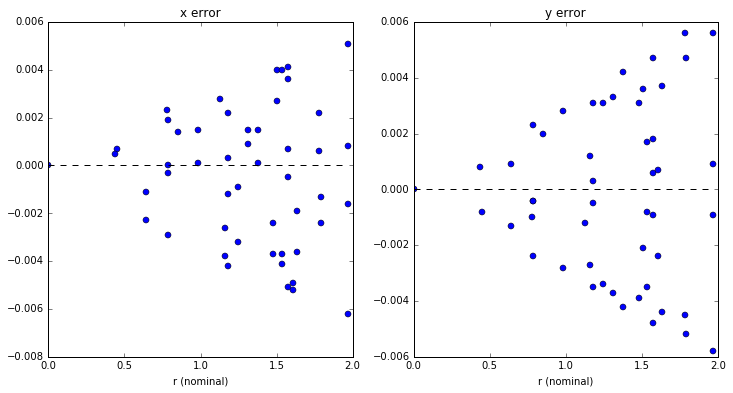

In [98]:
# original observations
plot_xy_err_2d(theta, xHat-x, yHat-y, xLabel='theta (nominal)')
plot_xy_err_2d(r, xHat-x, yHat-y, xLabel='r (nominal)')

In fact, if we apply a small clockwise rotation about the $z$ axis to the observed pin locations and compare these new adjusted locations to the design points, one observes a dramatic decrease in the location errors in $x$ and $y$.

Rotating observed pin locations about z axis
l2 error squared in x and y dimensions for original measurements: 3.92e-04 4.63e-04
l2 error squared in x and y dimensions for rotated measurements: 2.84e-05 1.35e-05


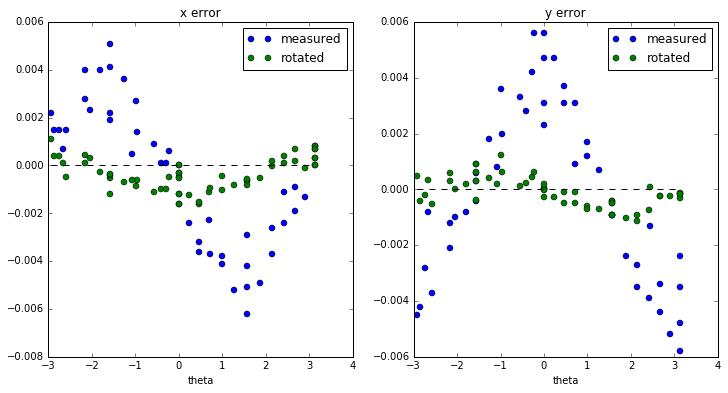

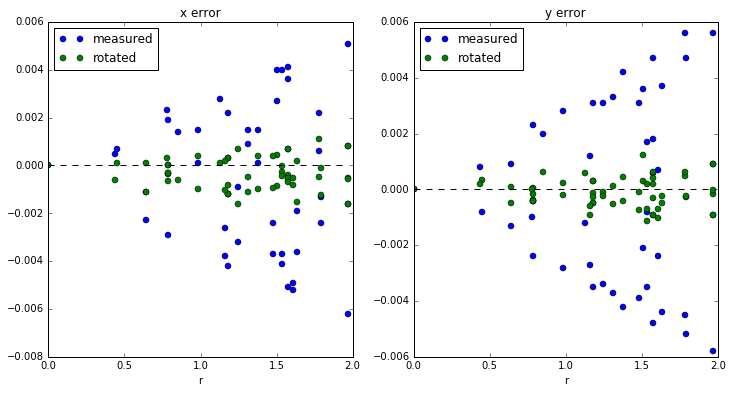

In [99]:
# correction factor
alpha = np.pi/1100.0 
rotClockwise = np.array([[np.cos(alpha), np.sin(alpha)], [-np.sin(alpha), np.cos(alpha)]])
print('Rotating observed pin locations about z axis')

# Variables with tildes are the "corrected" versions of the hats (observations)
obsHat = np.vstack((xHat, yHat))
obsTilde = np.dot(rotClockwise, obsHat)
xTilde = obsTilde[0,:]
yTilde = obsTilde[1,:]

xErrl2 = np.sum((xHat - x)**2)
yErrl2 = np.sum((yHat - y)**2)
print('l2 error squared in x and y dimensions for original measurements: %0.2e %0.2e') % (xErrl2, yErrl2)

xErrl2 = np.sum((xTilde - x)**2)
yErrl2 = np.sum((yTilde - y)**2)
print('l2 error squared in x and y dimensions for rotated measurements: %0.2e %0.2e') % (xErrl2, yErrl2)


# show both sets of errors
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
plt.plot(theta, xHat-x, 'bo')
plt.plot(theta, xTilde-x, 'go')
plt.legend(['measured', 'rotated'])
plt.plot([np.min(theta), np.max(theta)], [0,0], 'k--')
ax.set_xlabel('theta')
ax.set_title('x error')

ax = fig.add_subplot(122)
ax.plot(theta, yHat-y, 'bo')
ax.plot(theta, yTilde-y, 'go')
plt.legend(['measured', 'rotated'])
ax.plot([np.min(theta), np.max(theta)], [0,0], 'k--')
ax.set_xlabel('theta')
ax.set_title('y error')

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
plt.plot(r, xHat-x, 'bo')
plt.plot(r, xTilde-x, 'go')
plt.legend(['measured', 'rotated'], loc='NorthWest')
plt.plot([np.min(r), np.max(r)], [0,0], 'k--')
ax.set_xlabel('r')
ax.set_title('x error')

ax = fig.add_subplot(122)
ax.plot(r, yHat-y, 'bo')
ax.plot(r, yTilde-y, 'go')
plt.legend(['measured', 'rotated'], loc='NorthWest')
ax.plot([np.min(r), np.max(r)], [0,0], 'k--')
ax.set_xlabel('r')
ax.set_title('y error')

The rotated observations continue to exhibit a dependence on $r$ (distance from the origin of the artifact) as expected; however, the overall magnitude of these errors is reduced.

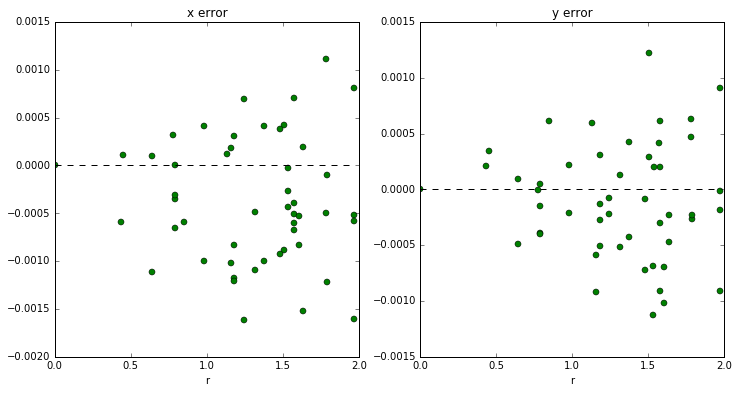

In [100]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
plt.plot(r, xTilde-x, 'go')
plt.plot([np.min(r), np.max(r)], [0,0], 'k--')
ax.set_xlabel('r')
ax.set_title('x error')

ax = fig.add_subplot(122)
ax.plot(r, yTilde-y, 'go')
ax.plot([np.min(r), np.max(r)], [0,0], 'k--')
ax.set_xlabel('r')
ax.set_title('y error')